# Analisi Esplorativa dei Dati

Analisi alle statistiche principali sfruttando i risultati ottenuti dal training dei modelli.

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import json

### Caricamento Dati

In [3]:
# Directory dei log generati e dei grafici
log_dir = '../training_results'

# Caricamento dei log
training_logs = {}
log_json_path = os.path.join(log_dir, 'training_summary.json')
if os.path.exists(log_json_path):
    with open(log_json_path, 'r') as file:
        training_logs = json.load(file)
    print('Caricamento dati del training avvenuto correttamente!')
else:
    print("ATTENZIONE: file trainin_summary.json non trovato. Assicurarsi che venga generato all'interno dello scipt principale run.py ed eseguirlo")
    exit()
training_logs

Caricamento dati del training avvenuto correttamente!


{'U-Net': {'train_loss': [0.043690852877155475,
   0.02539388423503564,
   0.021194522326389142,
   0.018404645235964946,
   0.015285617272932681,
   0.013902793050925519,
   0.010980013450872777,
   0.009825403097661955,
   0.009331709895069778,
   0.008493218062359599],
  'val_loss': [0.029811930996342207,
   0.02319659456565768,
   0.019161445140041002,
   0.016250528251872808,
   0.02223086497014528,
   0.012142448967498807,
   0.010326811647929634,
   0.008708115827905231,
   0.007949490503333113,
   0.008024417748353427],
  'val_dice': [0.5171439484989719,
   0.4940175020667725,
   0.5559526026950691,
   0.5598906096140644,
   0.5810131926112166,
   0.6467174238965868,
   0.6942230856779658,
   0.7414025531453077,
   0.7346945761412275,
   0.7564993902577836],
  'val_iou': [0.4306401604856204,
   0.4114350190376659,
   0.4786431860313164,
   0.47923698568571543,
   0.49744751503359647,
   0.5503275537703515,
   0.6026454040821657,
   0.655378165623175,
   0.6475398170329257,
   0

In [4]:
# Implementazione di un dizionario per memorizzare i risultati migliori ogni modello
results = {}

for model_name, logs in training_logs.items():
    df = pd.DataFrame(logs)

    best_epoch_idx = df['val_dice'].idxmax()
    best_val_loss = df.loc[best_epoch_idx, 'val_loss']
    best_dice = df.loc[best_epoch_idx, 'val_dice']
    best_iou = df.loc[best_epoch_idx, 'val_iou']
    best_epoch_num = best_epoch_idx + 1

    results[model_name] = {
        'Best Epoch': best_epoch_num,
        'Best Val Loss': f"{best_val_loss:.4f}",
        'Best Dice': f"{best_dice:.4f}",
        'Best IoU': f"{best_iou:.4f}"
    }

results_df = pd.DataFrame.from_dict(results, orient='index')   
print("\n--- Tabella Riassuntiva delle Performance dei Modelli ---")
print(results_df)


--- Tabella Riassuntiva delle Performance dei Modelli ---
                 Best Epoch Best Val Loss Best Dice Best IoU
U-Net                    10        0.0080    0.7565   0.6746
Attention U-Net          10        0.0070    0.8073   0.7287
LinkNet                  10        0.0075    0.7945   0.7138



--- Visualizzazione dei Grafici delle Metriche ---


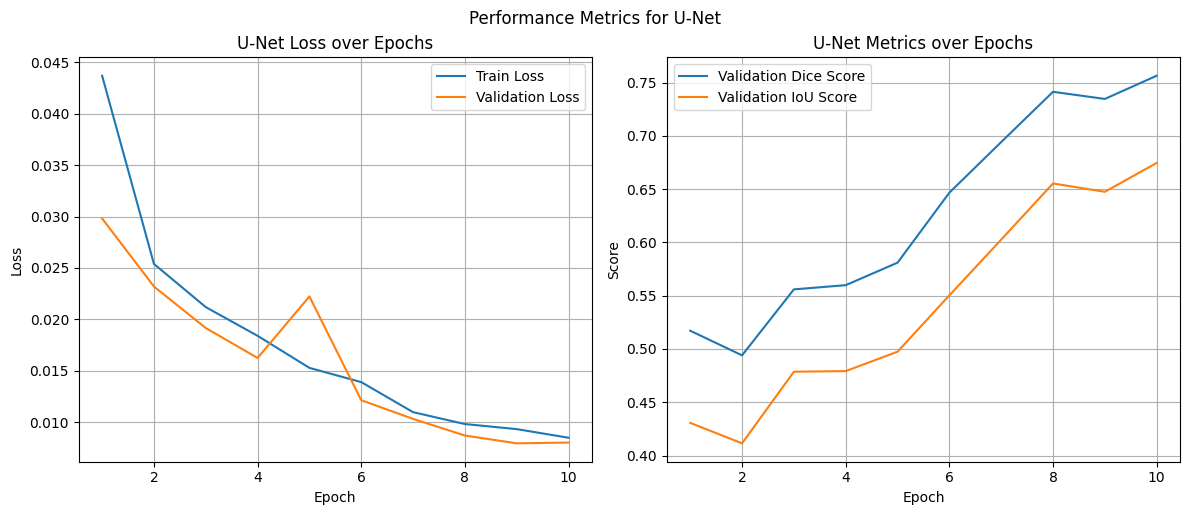

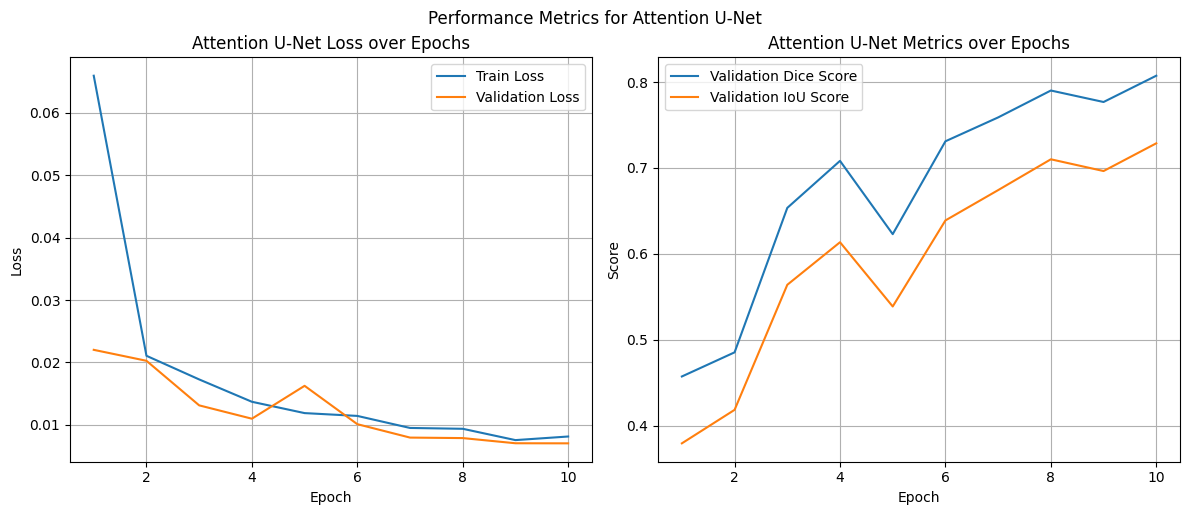

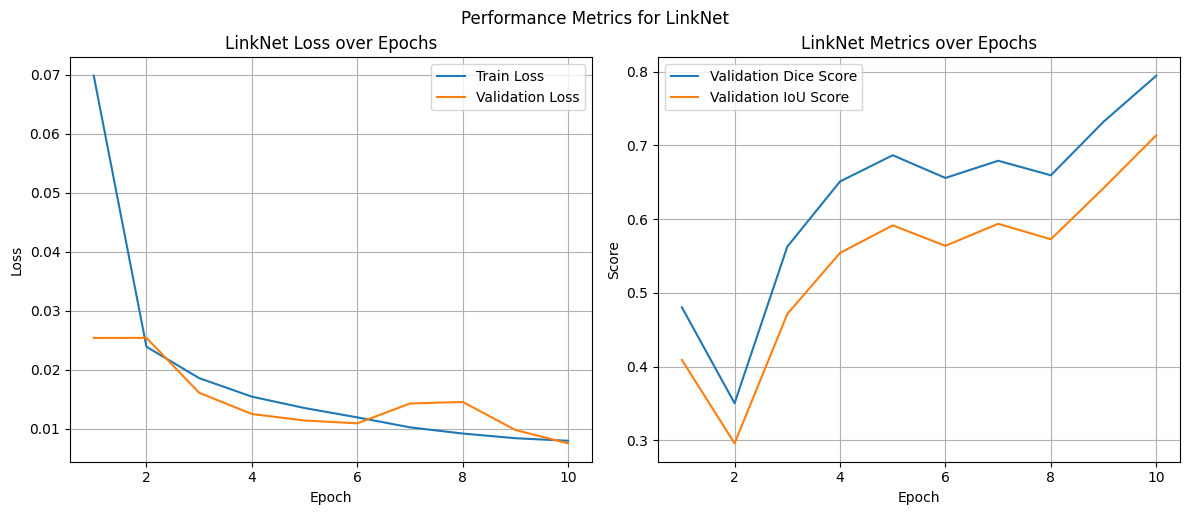

In [ ]:
print("\n--- Visualizzazione dei Grafici delle Metriche ---")
# Analisi e visualizzazione dei grafici
for model_name, logs in training_logs.items():
    plt.figure(figsize=(12, 5))

    # Grafico della Loss
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(logs['train_loss']) + 1), logs['train_loss'], label='Train Loss')
    plt.plot(range(1, len(logs['val_loss']) + 1), logs['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Grafico di Dice e IoU
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(logs['val_dice']) + 1), logs['val_dice'], label='Validation Dice Score')
    plt.plot(range(1, len(logs['val_iou']) + 1), logs['val_iou'], label='Validation IoU Score')
    plt.title(f'{model_name} Metrics over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.suptitle(f'Performance Metrics for {model_name}', y=1.02)
    plt.show()